In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_path = 'images/train/'
val_path = 'images/validation/'

In [3]:
classes = ["0","1","2","3","4","5","6"]
img_size = 48

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import backend as k

In [10]:
model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_Stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True,
)

callbacks = [early_Stop]

In [12]:
import pickle
import numpy as np

pickle_in = open("data_x.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("data_y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X=np.array(X)
y=np.array(y)

In [13]:
history = model.fit(X,y,epochs = 40,validation_split=0.2,batch_size = 32,callbacks=callbacks)

Epoch 1/40
721/721 [==============================] - 338s 458ms/step - loss: 1.9070 - accuracy: 0.2107 - val_loss: 1.7854 - val_accuracy: 0.3320
Epoch 2/40
721/721 [==============================] - 240s 333ms/step - loss: 1.7344 - accuracy: 0.3250 - val_loss: 2.1139 - val_accuracy: 0.1934
Epoch 3/40
721/721 [==============================] - 295s 409ms/step - loss: 1.6212 - accuracy: 0.3730 - val_loss: 1.7216 - val_accuracy: 0.2956
Epoch 4/40
721/721 [==============================] - 262s 363ms/step - loss: 1.5520 - accuracy: 0.4060 - val_loss: 1.5139 - val_accuracy: 0.4092
Epoch 5/40
721/721 [==============================] - 285s 394ms/step - loss: 1.4985 - accuracy: 0.4241 - val_loss: 1.7457 - val_accuracy: 0.2985
Epoch 6/40
721/721 [==============================] - 300s 416ms/step - loss: 1.4696 - accuracy: 0.4371 - val_loss: 1.5411 - val_accuracy: 0.4042
Epoch 7/40
721/721 [==============================] - 288s 400ms/step - loss: 1.4226 - accuracy: 0.4487 - val_loss: 1.9174 -

In [14]:
model.save('face_expression_2.h5')
model.save('face_expression_2.model')

INFO:tensorflow:Assets written to: face_expression_2.model/assets


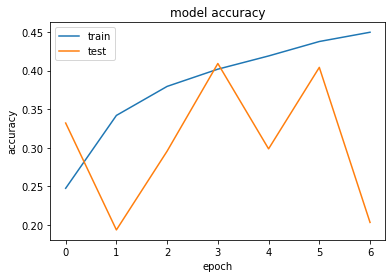

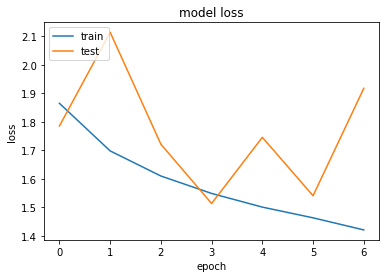

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()